**Використана команда для зібрання даних:
`find /c -type f -ls | awk '{print $7}' > results.txt`**

`find /path` - пошук файлів в папці

`-type f` - знайдені файли мають бути звичайними файлами

`-ls` - подає файли в форматі `ls -dils` (`204744 17 -rw-r--r-- 1 djm staff 17337 Nov 2 1992 ./lwall-quotes`), на 7 позиції розмір файлу

`|` - перенаправляє вихідний потік першої команди в вхідний другої

`awk '{print $7}'` - виводить сьоме слово

`> results.txt` - перенаправляє вихідний потік в файл

Час виконання команди: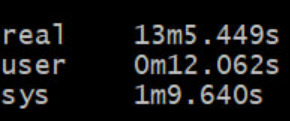

In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import math

In [2]:
sizes = defaultdict(int)
data = []
fl = open("results1.txt", 'r')
for line in fl:
    size = int(line)
    sizes[size] += 1
    data.append(size)
n = sum(sizes.values())
total_size = sum(k*v for k, v in sizes.items())
max_size = max(sizes.keys())

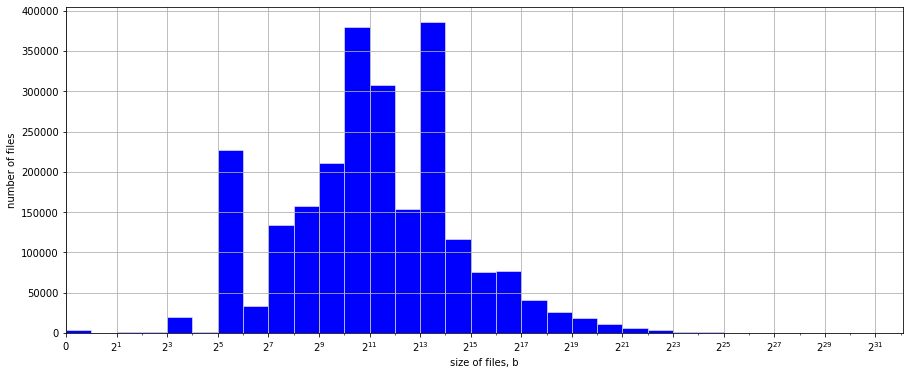

In [6]:
bins = [0, 1]
for i in range(math.floor(math.log2(max_size))):
    bins.append(bins[-1]*2)

plt.figure(figsize=(15, 6))

plt.hist(data, bins, linewidth=0.5, edgecolor="white", color="blue")
plt.xscale('symlog', base = 2, subs = [2])
plt.xlim(0, max_size)

plt.ylabel('number of files')
plt.xlabel('size of files, b')

plt.grid(True)
plt.show()

80% of files are not larger than 12 kB
Total files: 2397406
Total size: 201921060128
Max file size: 4563402752


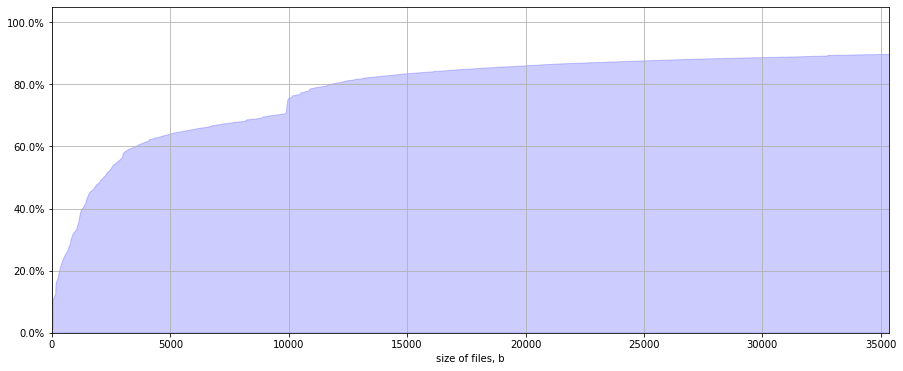

In [8]:
files = [(k, v) for k, v in sizes.items()]
files.sort()

c, lim_size = 0, 0
x, y = [], []
for k, v in files:
    c += v
    x.append(k)
    y.append(c / n * 100)
    if c >= 0.8*n and lim_size == 0:
        lim_size = k

print('80% of files are not larger than', math.ceil(lim_size / 1024), 'kB')
print('Total files:', n)
print('Total size:', total_size)
print('Max file size:', max_size)

plt.figure(figsize=(15, 6))

ax = plt.subplot()
ax.stackplot(x, y, color="blue", alpha=0.2)
ax.yaxis.set_major_formatter('{x}%')
ax.set(xlim = (0, lim_size*3))
plt.xlabel('size of files, b')
plt.grid(True)
plt.show()

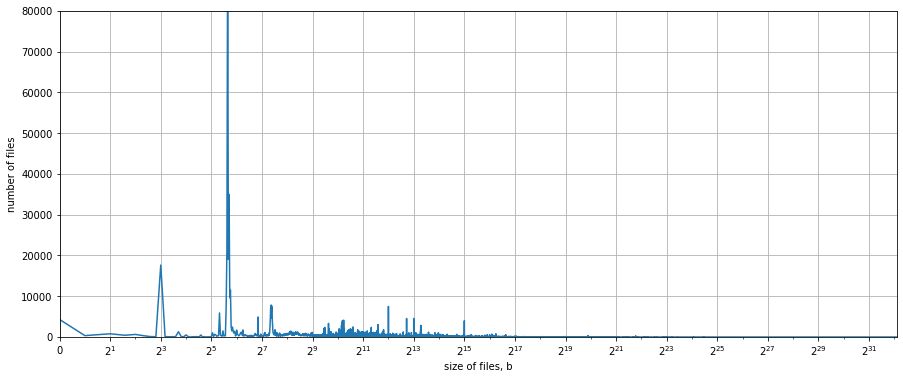

In [5]:
plt.figure(figsize=(15, 6))
x = [el[0] for el in files]
y = [el[1] for el in files]
plt.plot(x, y)
plt.xscale('symlog', base = 2, subs = [2])
plt.axis([0, max_size, 0, 80000])
plt.ylabel('number of files')
plt.xlabel('size of files, b')
plt.grid(True)
plt.show()